In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [20]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [21]:
data = np.genfromtxt("ex1data1.txt", delimiter=",")
data

array([[ 6.1101 , 17.592  ],
       [ 5.5277 ,  9.1302 ],
       [ 8.5186 , 13.662  ],
       [ 7.0032 , 11.854  ],
       [ 5.8598 ,  6.8233 ],
       [ 8.3829 , 11.886  ],
       [ 7.4764 ,  4.3483 ],
       [ 8.5781 , 12.     ],
       [ 6.4862 ,  6.5987 ],
       [ 5.0546 ,  3.8166 ],
       [ 5.7107 ,  3.2522 ],
       [14.164  , 15.505  ],
       [ 5.734  ,  3.1551 ],
       [ 8.4084 ,  7.2258 ],
       [ 5.6407 ,  0.71618],
       [ 5.3794 ,  3.5129 ],
       [ 6.3654 ,  5.3048 ],
       [ 5.1301 ,  0.56077],
       [ 6.4296 ,  3.6518 ],
       [ 7.0708 ,  5.3893 ],
       [ 6.1891 ,  3.1386 ],
       [20.27   , 21.767  ],
       [ 5.4901 ,  4.263  ],
       [ 6.3261 ,  5.1875 ],
       [ 5.5649 ,  3.0825 ],
       [18.945  , 22.638  ],
       [12.828  , 13.501  ],
       [10.957  ,  7.0467 ],
       [13.176  , 14.692  ],
       [22.203  , 24.147  ],
       [ 5.2524 , -1.22   ],
       [ 6.5894 ,  5.9966 ],
       [ 9.2482 , 12.134  ],
       [ 5.8918 ,  1.8495 ],
       [ 8.211

<IPython.core.display.Javascript object>


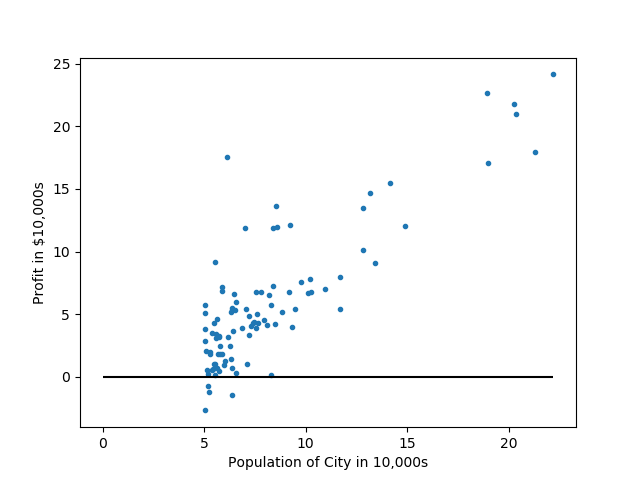

In [22]:
def plotData(data):
    fig = plt.figure()
    plt.scatter(data[:,0], data[:, 1], marker=".", zorder=1)
    plt.hlines(0, 0, max(data[:, 0]))
    plt.ylabel("Profit in $10,000s")
    plt.xlabel("Population of City in 10,000s")
    return fig

_ = plotData(data)

In [23]:
X= data[:, 0]
y = data[:, 1]

In [24]:
m = data.shape[0]

In [25]:
class Linear_regression():
    """
    A simple implementation of linear regression
    """
    def __init__(self, iterations=1500, alpha=0.01):
        self.iterations = iterations
        self.alpha = alpha
        self.theta = np.zeros([2,1])
        self.costs = []
        
    def fit(self, X, y):
        """
        Fits the data with gradient descent
        """
        self.theta = np.zeros([2, 1])
        m = X.shape[0]
        iteration = 0
        while(True):
            iteration += 1
            _ = self.cost_function(X, y)
            if iteration >= self.iterations or (len(self.costs) > 1 and abs(self.costs[-1]) <= 0.01):
                break
            # Should be a vertical column that is summed up
            difference = self.h_theta(X) - y
            update_values = np.dot(X.transpose(), difference)/m
            self.theta = self.theta - self.alpha*update_values
    
    def cost_function(self, X, y, theta=None):
        """
        Returns the current cost function, also appends it to the
        costs list
        """
        if theta is not None:
            self.theta = theta
        current_hypothesis = self.h_theta(X)
        difference = current_hypothesis - y
        squared_error = difference**2
        cost = np.sum(squared_error)/(2*X.shape[0])
        self.costs.append(cost)
        return cost
    
    def h_theta(self, X):
        """
        Is equivalent to theta_0 x X_0 + theta_1 x X_1
        :return: A vector of the values
        """
        return np.dot(X, self.theta)
    
    def predict(self, X):
        """
        :return: The predicted y
        """
        return self.h_theta(X)

    
def setup(data):
    """
    :return: X, y
    """
    m = data.shape[0]
    X_temp = np.reshape(data[:, 0], (m, 1))
    X = np.append(np.ones((m, 1)), X_temp, axis= 1)
    y = np.reshape(data[:,-1], (m, 1))
    
    return X, y, m
    

<IPython.core.display.Javascript object>


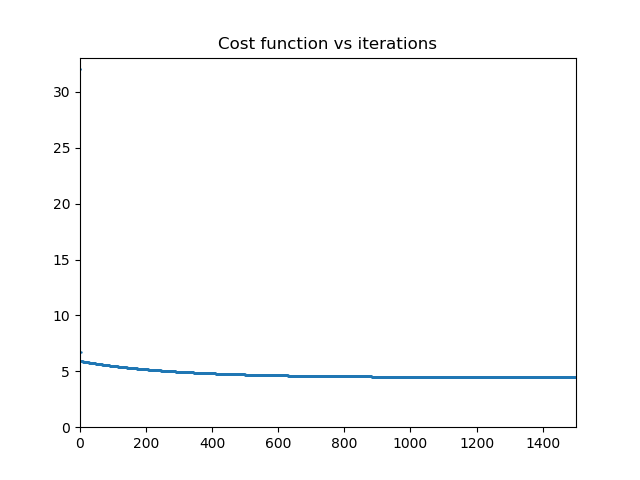

4.483411453374869
theta_0:-3.6298120050247755, theta_1:1.166314185951815


<IPython.core.display.Javascript object>


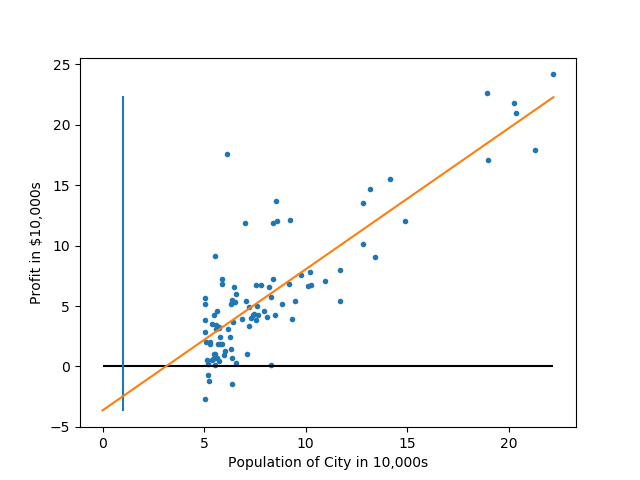

In [26]:
%matplotlib notebook
X, y, m = setup(data)
lin_reg = Linear_regression(iterations=1500)
lin_reg.cost_function(X, y)
lin_reg.fit(X, y)

fig = plt.figure()
plt.scatter(range(0, len(lin_reg.costs)), lin_reg.costs, s=0.5)
plt.xlim(0, len(lin_reg.costs))
plt.ylim(0, max(lin_reg.costs) + 1)
plt.title("Cost function vs iterations")
print(min(lin_reg.costs))
print("theta_0:{}, theta_1:{}".format(lin_reg.theta[0,0], lin_reg.theta[1, 0]))

x_points = np.array([[1, 0] ,[1, max(X[:, 1])]])
y_points = lin_reg.predict(x_points)
fig = plotData(data)

plt.plot(x_points, y_points, zorder=2)

<IPython.core.display.Javascript object>


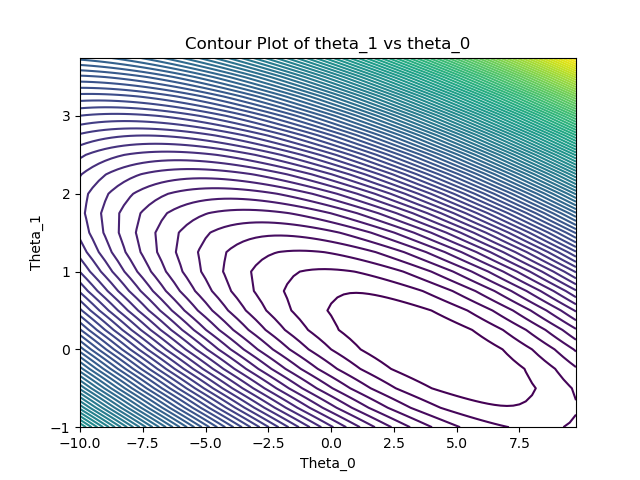

<IPython.core.display.Javascript object>


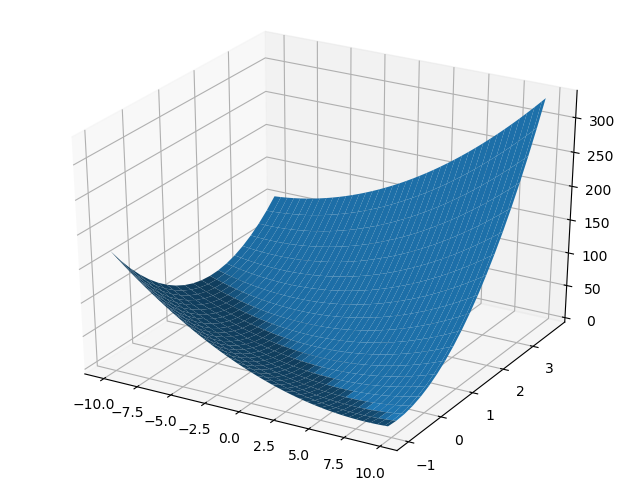

In [27]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
np.set_printoptions(threshold=np.nan)
def draw_contour_plot(theta_0_range=[-20, 20], theta_1_range=[-20, 20]):
    assert isinstance(theta_0_range, (list, tuple))
    theta_0 = np.arange(-10, 10, step=0.25)
    theta_1 = np.arange(-1, 4, step=0.25)
    Theta_0, Theta_1 = np.meshgrid(theta_0, theta_1)
    Costs = np.zeros([len(theta_1), len(theta_0)])
    for x in range(0, len(theta_0)):
        for y in range(0, len(theta_1)):
            theta = np.array([[theta_0[x]],[theta_1[y]]])
            Costs[y, x] = Linear_regression().cost_function(X, y, theta=theta)

    fig = plt.Figure()
    
    plt.contour(Theta_0, Theta_1, Costs, 100)
    plt.title("Contour Plot of theta_1 vs theta_0")
    plt.ylabel("Theta_1")
    plt.xlabel("Theta_0")
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.canvas
    _ = Axes3D(fig).plot_surface(Theta_0, Theta_1, Costs)
    plt.show()
draw_contour_plot([-10, 10], [-1, 4])

In [95]:
class Linear_regression_general():
    """
    A simple implementation of linear regression
    """
    def __init__(self, iterations=1500, alpha=0.01):
        self.iterations = iterations
        self.alpha = alpha
        self.theta = None
        self.costs = []
        self.feature_normalization = None
        self.mean = None
        self.std_dev = None
        
    def fit(self, X, y):
        """
        Fits the data with gradient descent
        """
        X, m = self._setup(X)
        self.theta = np.zeros((X.shape[1], 1))
        
        iteration = 0
        while(True):
            iteration += 1
            _ = self.cost_function(X, y)
            if iteration >= self.iterations or (len(self.costs) > 1 and abs(self.costs[-1]) <= 0.01):
                break
            # Should be a vertical column that is summed up
            difference = self.h_theta(X) - y
            update_values = np.dot(X.transpose(), difference)/m
            self.theta = self.theta - self.alpha*update_values
    
    def _setup(self, X):
        """
        Reshapes X to have a column of ones
        """
        m = X.shape[0]
        X_norm = self._normalization(X)
        X_temp = np.append(np.ones((m, 1)), X_norm, axis=1)
        return X_temp, m
    
    def _normalization(self, X):
        if self.feature_normalization:
            return self._scale(X)
        else:
            self.feature_normalization = True
            self.std_dev = np.std(X, axis=0)
            self.mean = np.mean(X, axis=0)
            return self._scale(X)
            
    def _scale(self, X):
        X_new = np.zeros(X.shape)
        for i in range(0, X.shape[1]):
                X_new[:, i] = (X[:, i] - self.mean[i])/self.std_dev[i]
        return X_new
    
    def cost_function(self, X, y, theta=None):
        """
        Returns the current cost function, also appends it to the
        costs list
        """
        if theta is not None:
            self.theta = theta
        current_hypothesis = self.h_theta(X)
        difference = current_hypothesis - y
        squared_error = difference**2
        cost = np.sum(squared_error)/(2*X.shape[0])
        self.costs.append(cost)
        return cost
    
    def h_theta(self, X):
        """
        Is equivalent to theta_0 x X_0 + theta_1 x X_1
        :return: A vector of the values
        """
        return np.dot(X, self.theta)
    
    def predict(self, X):
        """
        :return: The predicted y
        """
        X_trans_norm, _ = self._setup(X_norm)
        return self.h_theta(X_trans)

In [59]:
m = data.shape[0]
y = np.reshape(data[:,-1], (m, 1))
X_temp = np.reshape(data[:, 0], (m, 1))
X = np.append(np.ones((m, 1)), X_temp, axis= 1)
lin_reg_general = Linear_regression_general()
lin_reg_general.fit(X, y)

In [82]:
data_3d = np.genfromtxt("ex1data2.txt", delimiter=",")
print(data_3d)
print(np.mean(data_3d, axis=0))

[[2.10400e+03 3.00000e+00 3.99900e+05]
 [1.60000e+03 3.00000e+00 3.29900e+05]
 [2.40000e+03 3.00000e+00 3.69000e+05]
 [1.41600e+03 2.00000e+00 2.32000e+05]
 [3.00000e+03 4.00000e+00 5.39900e+05]
 [1.98500e+03 4.00000e+00 2.99900e+05]
 [1.53400e+03 3.00000e+00 3.14900e+05]
 [1.42700e+03 3.00000e+00 1.98999e+05]
 [1.38000e+03 3.00000e+00 2.12000e+05]
 [1.49400e+03 3.00000e+00 2.42500e+05]
 [1.94000e+03 4.00000e+00 2.39999e+05]
 [2.00000e+03 3.00000e+00 3.47000e+05]
 [1.89000e+03 3.00000e+00 3.29999e+05]
 [4.47800e+03 5.00000e+00 6.99900e+05]
 [1.26800e+03 3.00000e+00 2.59900e+05]
 [2.30000e+03 4.00000e+00 4.49900e+05]
 [1.32000e+03 2.00000e+00 2.99900e+05]
 [1.23600e+03 3.00000e+00 1.99900e+05]
 [2.60900e+03 4.00000e+00 4.99998e+05]
 [3.03100e+03 4.00000e+00 5.99000e+05]
 [1.76700e+03 3.00000e+00 2.52900e+05]
 [1.88800e+03 2.00000e+00 2.55000e+05]
 [1.60400e+03 3.00000e+00 2.42900e+05]
 [1.96200e+03 4.00000e+00 2.59900e+05]
 [3.89000e+03 3.00000e+00 5.73900e+05]
 [1.10000e+03 3.00000e+00

In [91]:
m = data_3d.shape[0]
y_3d = np.reshape(data_3d[:,-1], (m, 1))
X_3d = np.reshape(data_3d[:, :-1], (m, 2))
lin_reg_general = Linear_regression_general()
lin_reg_general.fit(X_3d, y_3d)

[7.86202619e+02 7.52842809e-01]


<IPython.core.display.Javascript object>


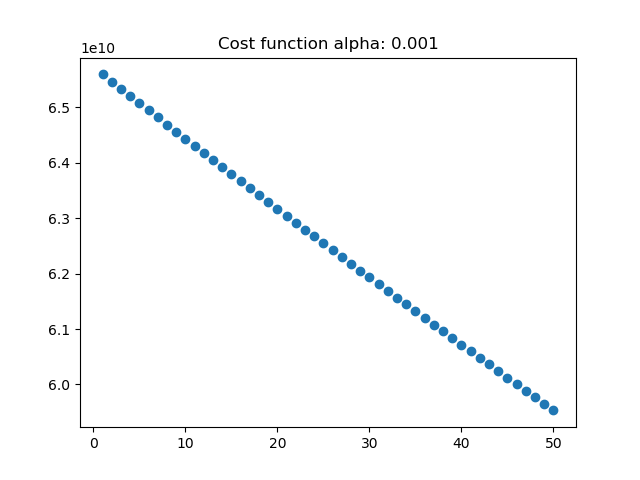

<IPython.core.display.Javascript object>


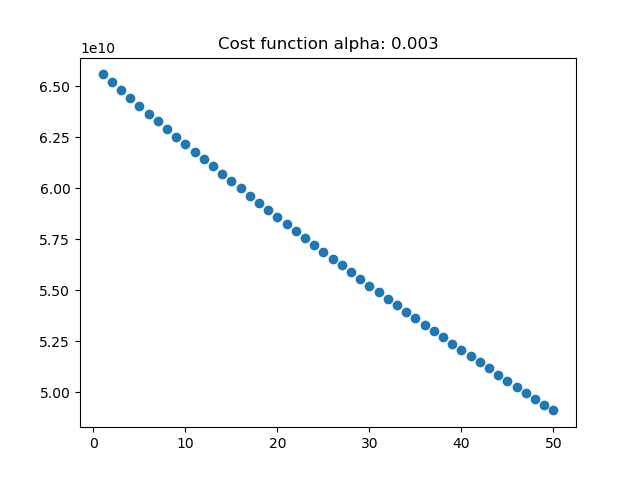

<IPython.core.display.Javascript object>


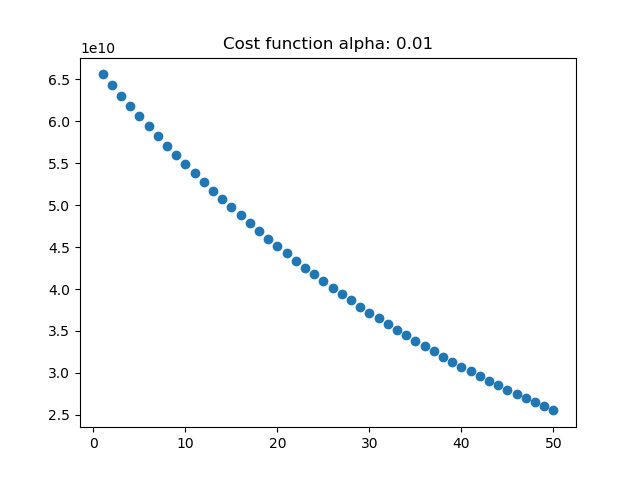

<IPython.core.display.Javascript object>


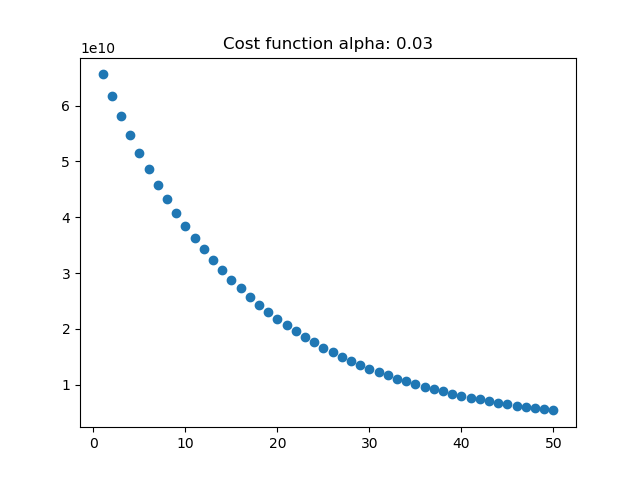

<IPython.core.display.Javascript object>


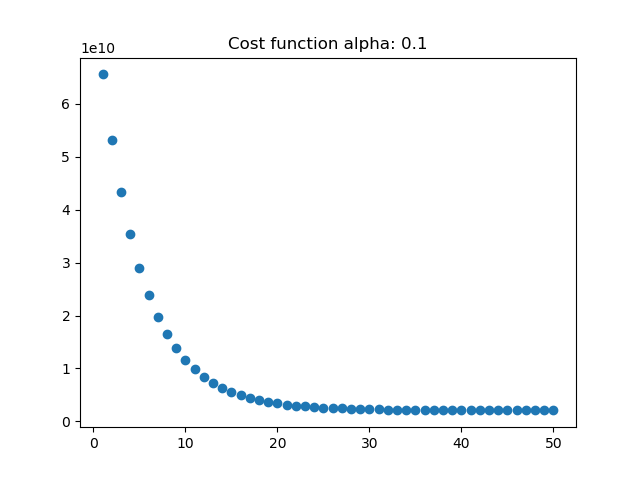

<IPython.core.display.Javascript object>


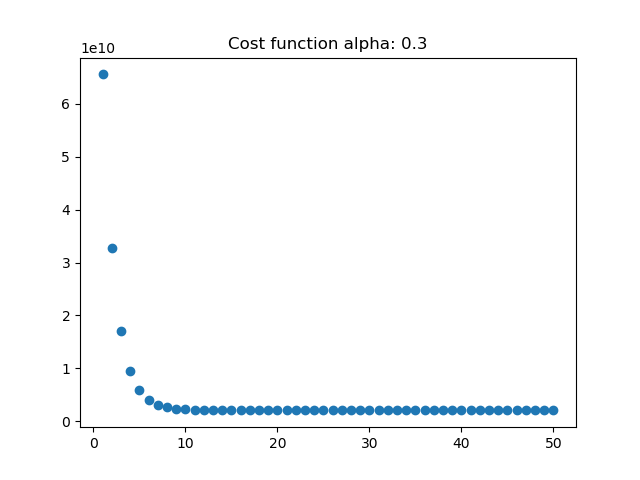

<IPython.core.display.Javascript object>


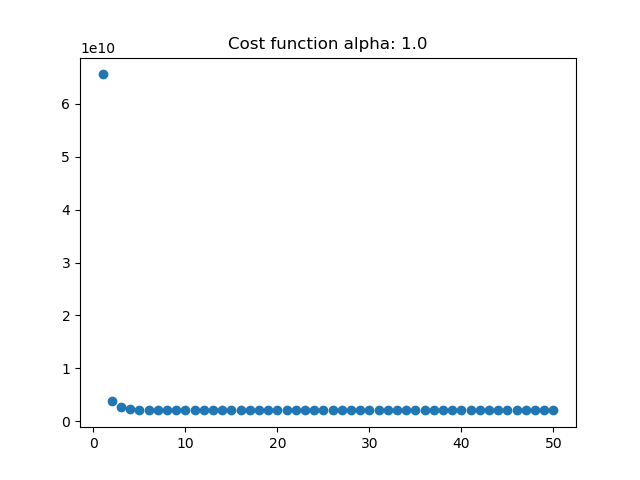

<IPython.core.display.Javascript object>


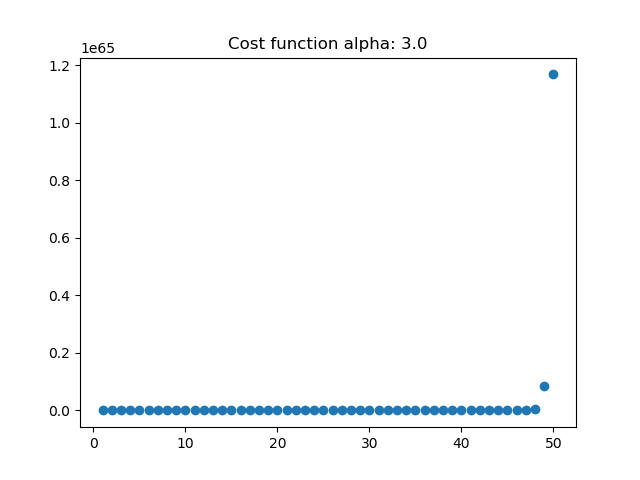

<IPython.core.display.Javascript object>


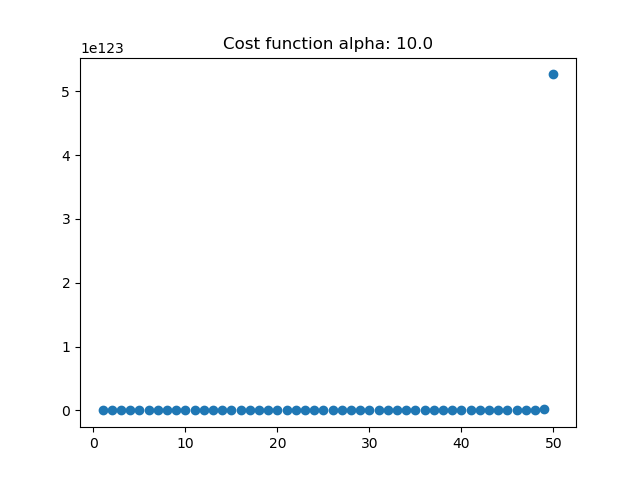

<IPython.core.display.Javascript object>


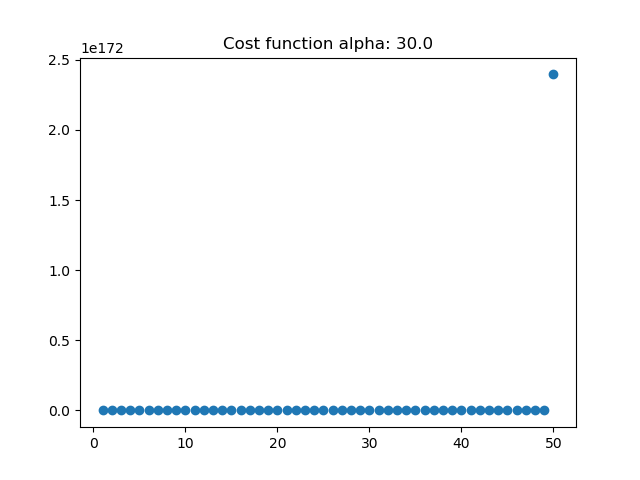

<IPython.core.display.Javascript object>


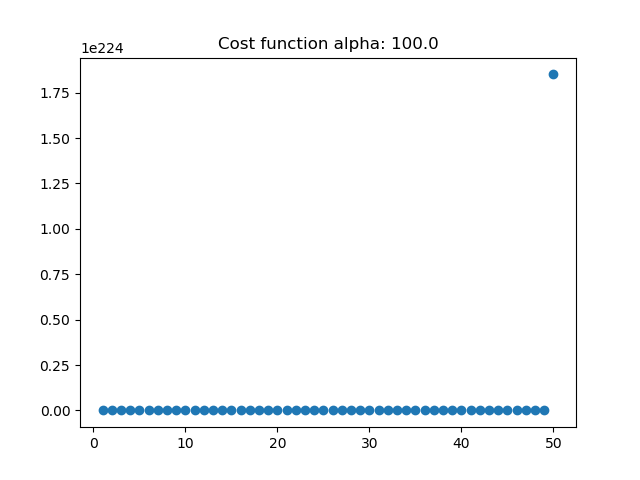

<IPython.core.display.Javascript object>


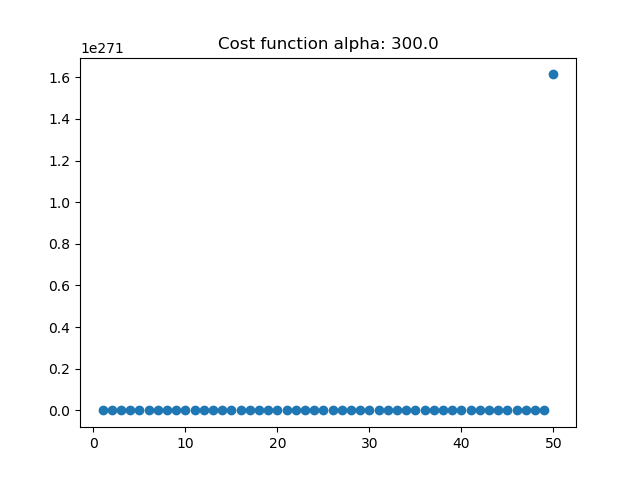

C:\Users\sora4\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in square


<IPython.core.display.Javascript object>


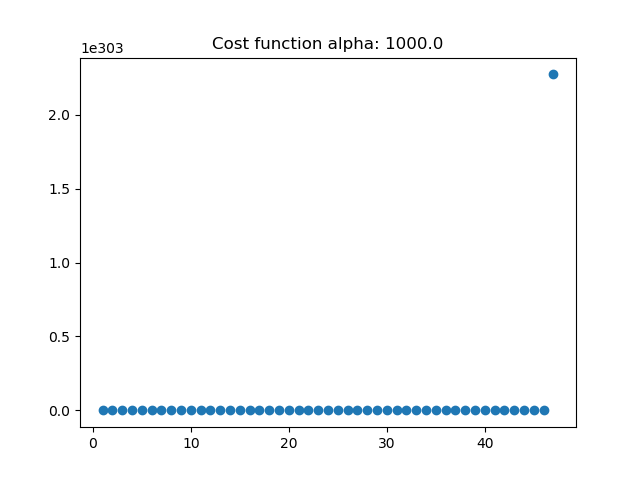

<IPython.core.display.Javascript object>


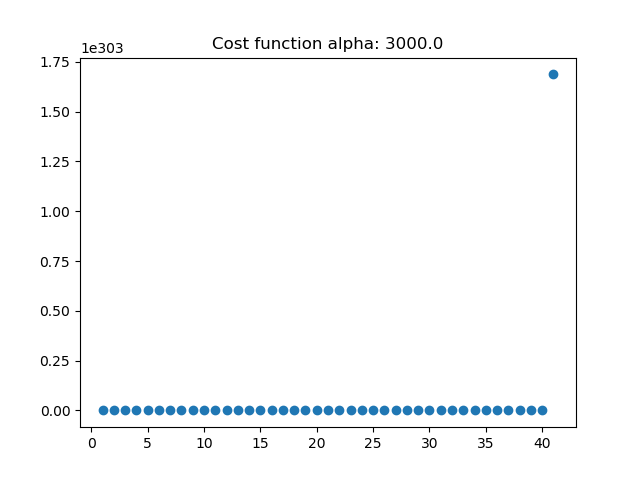

In [98]:
%matplotlib notebook
"""
Check learning rates
"""
for i in [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0]:
    lin_reg_general = Linear_regression_general(iterations=50, alpha=i)
    lin_reg_general.fit(X_3d, y_3d)
    fig = plt.figure()
    plt.title("Cost function alpha: {}".format(i))
    plt.scatter(range(1,51), lin_reg_general.costs)
    plt.show()